In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #For Data Visualization
import seaborn as sns            
# Data modelling imports will be taken in later

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**DATA PROCESSING**

In [7]:
#Loading Dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
#Training Data
# train.head()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Finding Null Values in dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Test Data
#test.shape
#test.head()
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
#Finding Null values in test data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**DATA VISUALIZATION**

In [13]:
train.Sex.value_counts() # Count of each gender type 

male      577
female    314
Name: Sex, dtype: int64

In [14]:
train.groupby('Sex').Survived.value_counts() # Grouping Gender Data with survival 

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

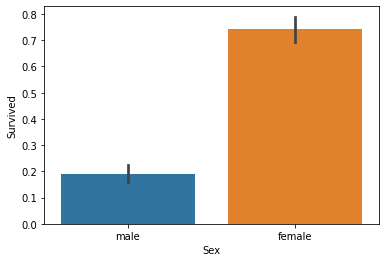

In [15]:
sns.barplot(x='Sex', y='Survived', data = train); # Visualising above data using seaborn

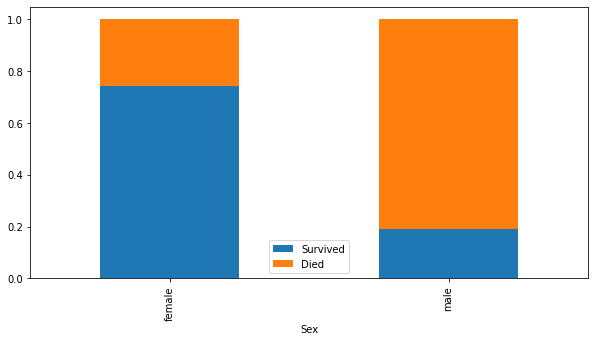

In [16]:
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(10, 5),stacked=True);
# Visualising data of above mentioned grouping

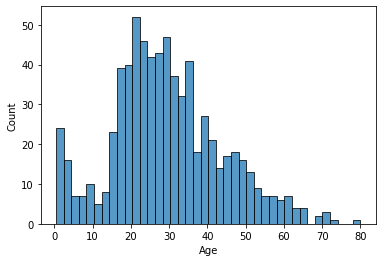

In [17]:
sns.histplot(train['Age'].dropna(), kde = False, bins=40); # Visualising count wrt Age

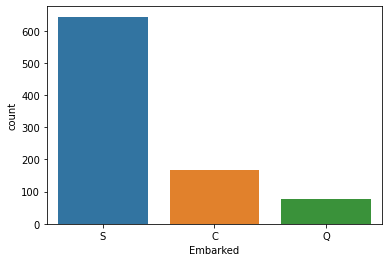

In [18]:
sns.countplot(x = 'Embarked', data = train); # visualising count wrt embarked station

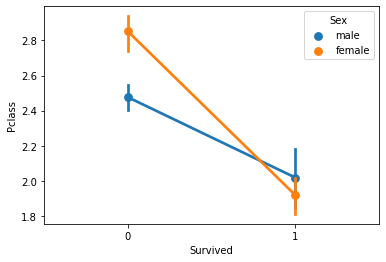

In [19]:
# Survival based on passenger class and sex
sns.pointplot(y = 'Pclass',x = 'Survived', hue='Sex', data = train);

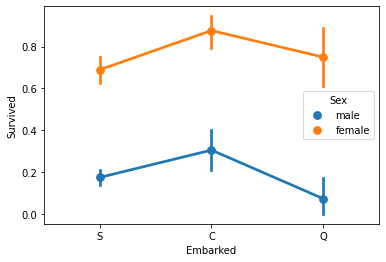

In [20]:
# Survival based on Embarked and sex
sns.pointplot(y = 'Survived', x = 'Embarked', hue = 'Sex', data = train);

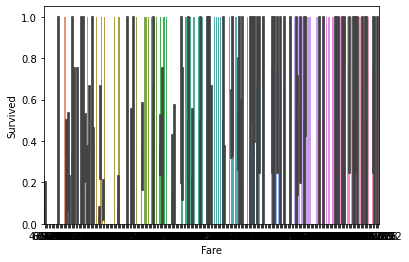

In [21]:
sns.barplot(x='Fare', y = 'Survived', data = train); # Visualising fare rate and survival status

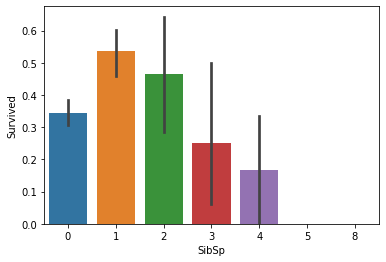

In [22]:
sns.barplot(x='SibSp', y = 'Survived', data = train); # visualising barplot of survival status with 

<AxesSubplot:>

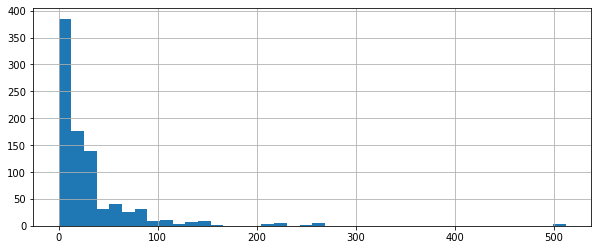

In [23]:
train['Fare'].hist(bins=40,figsize=(10,4)) # Histogram

**FEATURE EXTRACTION**

In [24]:
# Extracting features for training our model
title = set()
for name in train['Name']:
    title.add(name.split(',')[1].split('.')[0].strip())
print(title)

{'Sir', 'Capt', 'Lady', 'Miss', 'Dr', 'Rev', 'Mme', 'Ms', 'Mlle', 'Major', 'Mrs', 'Don', 'Jonkheer', 'the Countess', 'Mr', 'Master', 'Col'}


In [26]:
title_dict={'Mrs':'Mrs','Major':'Other','Master':'Master','Lady':'Other','Mlle':'Miss','Dr':'Other','Col':'Other','Capt':'Other','Don':'Other','the Countess':'Other','Mme':'Mrs','Miss':'Miss','Jonkheer':'Other','Rev':'Other','Sir':'Other','Ms':'Miss','Mr':'Mr'}

In [27]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(title_dict)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [28]:
# Dropping feature for faster notebook execution
trainy = train.drop(['Name','Died','PassengerId', 'Ticket', 'Cabin'], axis = 1)  

trainy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [29]:
trainy.Sex = trainy.Sex.map({'female':0, 'male':1})
trainy.Title = trainy.Title.map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5})
trainy.Embarked = trainy.Embarked.map({'S':0, 'C':1, 'Q':2,'NaN':'NAN'})

In [30]:
mean_m = trainy[trainy['Sex']==1]['Age'].mean()
mean_f = trainy[trainy['Sex']==0]['Age'].mean()

In [31]:
trainy.loc[(trainy.Age.isnull())&(trainy['Sex']==0),'Age']=mean_f
trainy.loc[(trainy.Age.isnull())&(trainy['Sex']==1),'Age']=mean_m
trainy['Age']=(trainy.Age-min(trainy.Age))/(max(trainy.Age)-min(trainy.Age))

In [32]:
trainy.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [33]:
trainy['Embarked'] = trainy.Embarked.fillna(0)
trainy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,0.271174,1,0,7.2500,0,1
1,1,1,0,0.472229,1,0,71.2833,1,3
2,1,3,0,0.321438,0,0,7.9250,0,2
3,1,1,0,0.434531,1,0,53.1000,0,3
4,0,3,1,0.434531,0,0,8.0500,0,1


In [34]:
#Cleaning the test dataset
title = set()
for name in test['Name']:
    title.add(name.split(',')[1].split('.')[0].strip())
print(title)

{'Miss', 'Ms', 'Rev', 'Dr', 'Dona', 'Mrs', 'Mr', 'Master', 'Col'}


In [35]:
title_dict={'Mrs':'Mrs','Major':'Other','Master':'Master','Lady':'Other','Mlle':'Miss','Dr':'Other','Col':'Other','Capt':'Other','Dona':'Other','the Countess':'Other','Mme':'Mrs','Miss':'Miss','Jonkheer':'Other','Rev':'Other','Sir':'Other','Ms':'Miss','Mr':'Mr'}

In [36]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(title_dict)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [37]:
testy = test.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis = 1)
testy.Sex = testy.Sex.map({'female':0, 'male':1})
testy.Title = testy.Title.map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5})
testy.Embarked = testy.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
mean_m = testy[testy['Sex']==1]['Age'].mean()
mean_f = testy[testy['Sex']==0]['Age'].mean()

In [38]:
testy.loc[(testy.Age.isnull())&(testy['Sex']==0),'Age']=mean_f
testy.loc[(testy.Age.isnull())&(testy['Sex']==1),'Age']=mean_m
testy['Age']=(testy.Age-min(testy.Age))/(max(testy.Age)-min(testy.Age))
testy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
dtype: int64

In [39]:
testy['Fare'] = testy['Fare'].fillna(testy['Fare'].mean())
testy.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,7.8292,2,1
1,3,0,0.617566,1,0,7.0000,0,3
2,2,1,0.815377,0,0,9.6875,2,1
3,3,1,0.353818,0,0,8.6625,0,1
4,3,0,0.287881,1,1,12.2875,0,3


In [40]:
testy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

**DATA MODELLING : USING DECISION TREE AND RFC**

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test,y_train, y_test = train_test_split(trainy.drop(['Survived'],axis = 1),trainy.Survived,test_size=0.30, random_state=121, stratify = trainy.Survived)

In [46]:
# For Data Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
dt = DecisionTreeClassifier(random_state = 121, max_depth = 5)
dt.fit(X_train,y_train)
ypred = dt.predict(X_test)
print("Accuracy Score = {}".format(round(accuracy_score(y_test,ypred)*100,2)))
print(confusion_matrix(y_test,ypred))

Accuracy Score = 82.84
[[145  20]
 [ 26  77]]


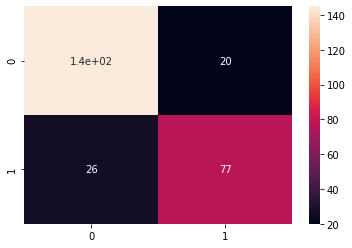

In [48]:
sns.heatmap(confusion_matrix(y_test,ypred),annot = True);

In [49]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500,
                             max_features = 'sqrt', 
                             min_samples_leaf = 10, 
                             random_state=121).fit(X_train,y_train)
ypred = rf.predict(X_test)
print("Accuracy Score = {}".format(round(accuracy_score(y_test,ypred)*100,2)))
print(confusion_matrix(y_test,ypred))

Accuracy Score = 83.58
[[151  14]
 [ 30  73]]


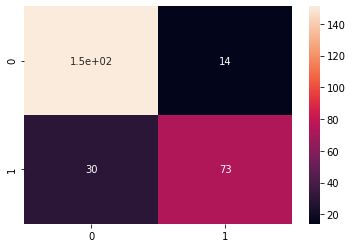

In [50]:
sns.heatmap(confusion_matrix(y_test,ypred),annot = True);

In [51]:
# Comparing two models that we implemented, Random Forest is more accurate
pred = rf.predict(testy)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

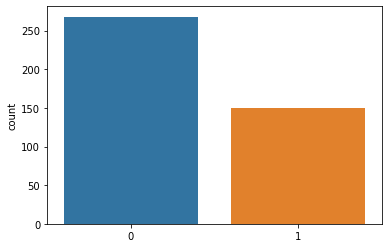

In [52]:
sns.countplot(x=pred);

In [53]:
submit=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred})
submit.to_csv('./submission.csv',index=False)